In [1]:
# ライブラリインポート

## 基本ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 分解
import scipy.stats
from sklearn.model_selection import train_test_split
import my_function

## 学習
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time

In [2]:
# データ読み込み

## csv読み込み
df = pd.read_csv('./available_csv/AirPassengers.csv')
print(df.head())

## データ整形（必要であれば）
df = df['Passengers']
print(df.head())

        Month  Passengers
0  1949-01-01         112
1  1949-02-01         118
2  1949-03-01         132
3  1949-04-01         129
4  1949-05-01         121
0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64


In [3]:
# 分解（singleの場合、整形のみ）

## 正規化
raw_array = scipy.stats.zscore(df)

## データの整形
### default : SlideingWindow = 5
raw_x, raw_y = my_function.sliding_window(raw_array)

## データの分割
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.1, shuffle=False)

In [4]:
# 学習

## 単体学習
### RNN

#### モデル構築準備
length_of_sequence = raw_x_train.shape[1] 
in_out_neurons = 1
n_hidden = 300

#### モデル構築
model = Sequential()
model.add(SimpleRNN(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam()
model.compile(loss="mean_squared_error", optimizer=optimizer)

## 処理前の時刻
t1 = time.time() 

#### 学習
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(raw_x_train, raw_y_train,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Epoch 1/100
1/1 [==============================] - 1s 822ms/step - loss: 0.5042 - val_loss: 0.8650
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.4744 - val_loss: 0.6935
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.3253 - val_loss: 0.4675
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.1452 - val_loss: 0.5253
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1765 - val_loss: 0.6018
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2343 - val_loss: 0.5570
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2180 - val_loss: 0.4500
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1607 - val_loss: 0.3709
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 0.1173 - val_loss: 0.3618
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1136 - val_loss: 0.4009
Epoch 11/100
1/1 [

In [5]:
# 予測

## 単体予測
rnn_pred = model.predict(raw_x_test)

## 処理後の時刻
t2 = time.time()

時間：3.9993984699249268
MSE：0.6784472360440773
RMSE：0.8236790855934594
KLD：5.782215829026847


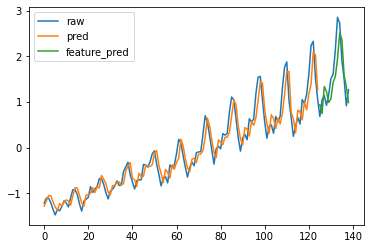

In [6]:
# 評価

## 学習時間
print(f"時間：{t2-t1}")

## 予測精度
print(f"MSE：{my_function.calc_mse(rnn_pred, raw_y_test)}")
print(f"RMSE：{my_function.calc_rmse(rnn_pred, raw_y_test)}")
print(f"KLD：{my_function.calc_kld(rnn_pred, raw_y_test)}")

## rnn
plt.figure()
plt.plot(raw_y, label='raw')
plt.plot(model.predict(raw_x_train).reshape(-1, 1), label='pred')
plt.plot(range((len(raw_y)-len(rnn_pred)),len(raw_y)),rnn_pred, label='feature_pred')
plt.legend()
plt.show()